# **LINEAR MODEL**

## Problem

Build a linear model that predicts the price of a house according to a simple formula:
$price = \$50,000 * (\#bedrooms) + \$50,000$.

Hint: Your network might work better if you scale the house price down.

## Initialize

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [2]:
# set random seeds
np.random.seed(0)
tf.random.set_seed(0)

# set matplotlib fontsize
mpl.rc('font', size=10)

# show figures inline and in high-quality (SVG)
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

## Dataset

Create a dataset using this formula: $Y = 5X + 5$. <br>
Where $X$ represents the number of bedrooms, and $Y$ represents price in $10,000.

In [3]:
# training dataset
x_train = np.array([1, 2, 4, 6, 8, 9, 10], dtype='float')
y_train = 5 + 5 * x_train

# testing dataset
x_test = np.array([3, 5, 7], dtype='float')
y_test = 5 + 5 * x_test

print("y_train:", y_train)
print("y_test:", y_test)

y_train: [10. 15. 25. 35. 45. 50. 55.]
y_test: [20. 30. 40.]


## Model

In [4]:
# layers
x = Input(shape=[1])
y = Dense(1)(x)

# model
model = tf.keras.Model(x, y)
model.compile(optimizer=SGD(lr=0.01), loss='mse')

# model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Training

**Note:**
- High learning rate may increase the loss (i.e., model may diverge).
- If trained for fewer epoch (e.g., 100), model may not learn the bias parameter well.

In [5]:
# train the model and save the history
hist = model.fit(
    x_train, y_train,
    epochs=500,
    verbose=0
)

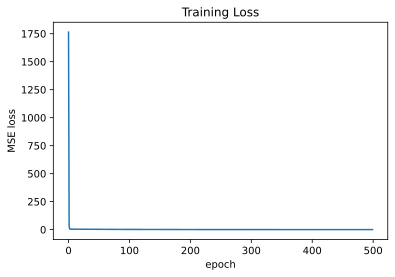

In [6]:
# plot the loss graph
plt.figure()
plt.title('Training Loss')
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.show()

**Learnerd parameters**:
- For the layers with learnable parameters:
- `model.layers[i].get_weights()` retuns a list of 2 elements.
- 1st one is the weight, and the 2nd one is the bias.

In [7]:
# look at the weights
weight, bias = model.layers[1].get_weights()

# set printing precision
np.set_printoptions(2)

# print learned parameters and formula
print(f'weight: {weight}')
print(f'bias: {bias}')
print(f'learned formula: Y = {weight.squeeze():.2f} * X + {bias.squeeze():.2f}')

weight: [[5.05]]
bias: [4.62]
learned formula: Y = 5.05 * X + 4.62


## Evauation

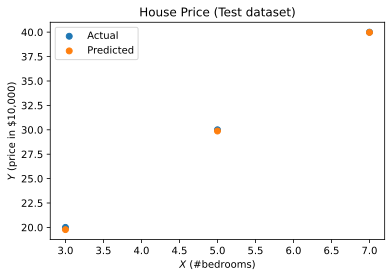

In [8]:
# test
y_pred = model.predict(x_test)

# plot
plt.figure()
plt.title('House Price (Test dataset)')
plt.scatter(x_test, y_test, label='Actual')
plt.scatter(x_test, y_pred, label='Predicted')
plt.xlabel(r'$X$ (#bedrooms)')
plt.ylabel(r'$Y$ (price in \$10,000)')
plt.legend()
plt.show()

In [9]:
# evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"MSE on test dataset: {mse:.4f}")

MSE on test dataset: 0.0229
